# MNIST neural network - Hyperparameter Optimization using Tensorflow

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

### 1. Load Fashion MNIST dataset

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_val, y_val) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

### 2. Visualize one image using matplotlib and print the shape of the train and test data

Label: 3


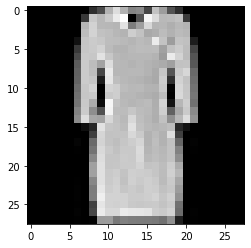

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[9000]))
plt.imshow(X_train[9000], cmap='gray')

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 3. Reshape the features to train the Deep Neural Network


In [ ]:
X_train = X_train.reshape(60000, 784)
print(X_train.shape)
X_val = X_val.reshape(10000, 784)
print(X_val.shape)

(60000, 784)
(10000, 784)


### 4. Normalize features
- Normalize features from 0-255 to 0-1

In [ ]:
print(X_train.max())
print(X_train.min())

X_train = X_train / 255.0
X_val = X_val / 255.0

print(X_train.max())
print(X_train.min())


255
0
1.0
0.0



### 5. One-hot encode the class vector


In [ ]:
import tensorflow as tf
print(y_train[10])
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
print(y_train[10])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 6. Display some images and print their labels

label for each of the below image: 9
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 2
label for each of the below image: 7
label for each of the below image: 2
label for each of the below image: 5
label for each of the below image: 5


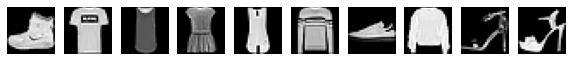

In [ ]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()


### 7. Write a function to train the Deep Neural Network with two hidden layers. The function should recieve a arguments iterations, learning rate and regularization penalty from the user. The choice of number of hidden layer neurons is yours. Use the SGD optimzer and use the momentum value as 0.9
- Written in a function - to run it multiple times

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(784,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)
    
    [loss,score_train]=model.evaluate(X_train,y_train)
    [loss,score_test]=model.evaluate(X_val,y_val)
    
    return score_train,score_test

### 8. Creating another function to train DNN model with the following modification
- Instead of accuracy at each epoch below code gives the consolidate accuracy
- Model should print both train and test accuracy

In [ ]:
def train_and_test_loop1(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(784,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)
    #score = model.evaluate(X_train, y_train, verbose=0)
    [loss,score_train]=model.evaluate(X_train,y_train)
    [loss,score_test]=model.evaluate(X_val,y_val)
    
    return score_train,score_test

### 9. Train the model with no regularization and choose some very very small value of lamda and comment about the model performance. 
- Double Check that the loss is reasonable
- Disable the regularization (Lambda = 0)

In [ ]:
lr = 0.00001
Lambda = 0
train_and_test_loop(10, lr, Lambda)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3720 - accuracy: 0.0641
Epoch 2/10
60000/60000 [==============================] - 1s 16us/sample - loss: 2.3579 - accuracy: 0.0677
Epoch 3/10
60000/60000 [==============================] - 1s 16us/sample - loss: 2.3440 - accuracy: 0.0721
Epoch 4/10
60000/60000 [==============================] - 1s 17us/sample - loss: 2.3306 - accuracy: 0.0779
Epoch 5/10
60000/60000 [==============================] - 1s 17us/sample - loss: 2.3177 - accuracy: 0.0837
Epoch 6/10
60000/60000 [==============================] - 1s 18us/sample - loss: 2.3052 - accuracy: 0.0912
Epoch 7/10
60000/60000 [==============================] - 1s 17us/sample - loss: 2.2932 - accuracy: 0.1005
Epoch 8/10
60000/60000 [==============================] - 1s 19us/sample - loss: 2.2814 - accuracy: 0.1112
Epoch 9/10
60000/60000 [==============================] - 1s 17us/sample - loss: 2.2700 - accuracy: 0.1239
Epoch 10/10
10

(0.14473334, 0.1456)

##### Loss is not changing in consecutive iteration. It may becasue of vanishing gradient

### 10. Incease the learning factor to some two digit number and comemnt about the model peformance. Kepp regularization factor as 0.

In [ ]:
lr = 20
Lambda = 0
train_and_test_loop1(10, lr, Lambda)

10000/10000 [==============================] - 0s 46us/sample - loss: 25.9717 - accuracy: 0.1000


(0.1, 0.1)

##### Loss is increasing. It may due to exploding gradient. Increasing alpha to big value also one reason for exploding

### 11. Explore the model for the alpha between 0.1 to 1 and comment about best alpha model performace

In [ ]:
lr=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in lr:
    score=train_and_test_loop1(10,i,0)
    print('epocs:',10,'train_accuracy:',score[0],'test_accuracy:',score[1],'alpha:', i)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.3347 - accuracy: 0.8766
epocs: 10 train_accuracy: 0.9051333 test_accuracy: 0.8766 alpha: 0.1
10000/10000 [==============================] - 0s 48us/sample - loss: 0.3403 - accuracy: 0.8797
epocs: 10 train_accuracy: 0.9055 test_accuracy: 0.8797 alpha: 0.2
10000/10000 [==============================] - 1s 59us/sample - loss: 0.3884 - accuracy: 0.8573
epocs: 10 train_accuracy: 0.87981665 test_accuracy: 0.8573 alpha: 0.3
10000/10000 [==============================] - 0s 47us/sample - loss: 0.4415 - accuracy: 0.8421
epocs: 10 train_accuracy: 0.86125 test_accuracy: 0.8421 alpha: 0.4
10000/10000 [==============================] - 1s 56us/sample - loss: 2.1223 - accuracy: 0.1966
epocs: 10 train_accuracy: 0.19578333 test_accuracy: 0.1966 alpha: 0.5
10000/10000 [==============================] - 1s 65us/sample - loss: 2.3038 - accuracy: 0.1000
epocs: 10 train_accuracy: 0.1 test_accuracy: 0.1 alpha: 0.6
10000/10000 [=========

##### When alpha=0.1, the model is peforming well, but slightly the overfitting is there, which can be reduced by regularizing the model

### 12. Choose the best value of learning factor from the above step and use some small value of regularization (lamda) and comment about the model performace.  


In [ ]:
train_and_test_loop1(10,0.1,0.005)

10000/10000 [==============================] - 1s 57us/sample - loss: 0.4016 - accuracy: 0.8655


(0.88516665, 0.8655)

In [ ]:
# Overfitting is reducing, but the model training performance also reducing slightly

### 13. Try a (larger) regularization say 50. Comment about the model performance?



In [ ]:
lr=0.1
Lambda = 50
train_and_test_loop1(20, lr, Lambda)

10000/10000 [==============================] - 0s 48us/sample - loss: nan - accuracy: 0.1000


(0.1, 0.1)

##### Loss id becoming too high (nan) as more penalty is added to the loss function

### 14. Find the best combination of learning rate and regularization lambda. Explore learning rate between 0.1 to 1 and lamda beteween 0.001 to 0.01


In [ ]:
#lr=[0.0001,0.001,0.01,0.1,1,10,20,50]
#lam=[0.0001,0.001,0.01,0.1,1,10,20,50]
lr=np.linspace(0.1,1,10)
lam=np.linspace(0.001,0.01,10)
for i,j in zip(lr,lam):
    score=train_and_test_loop1(5,i,j)
    print('epocs:',10,'train_accuracy:',score[0],'test_accuracy:',score[1],'alpha:', i,'Regularization:',j)

10000/10000 [==============================] - 0s 50us/sample - loss: 0.4103 - accuracy: 0.8610
epocs: 10 train_accuracy: 0.88018334 test_accuracy: 0.861 alpha: 0.1 Regularization: 0.001
10000/10000 [==============================] - 1s 56us/sample - loss: 0.4305 - accuracy: 0.8595
epocs: 10 train_accuracy: 0.8724 test_accuracy: 0.8595 alpha: 0.2 Regularization: 0.002
10000/10000 [==============================] - 0s 49us/sample - loss: 0.4421 - accuracy: 0.8471
epocs: 10 train_accuracy: 0.86558336 test_accuracy: 0.8471 alpha: 0.30000000000000004 Regularization: 0.003
10000/10000 [==============================] - 0s 50us/sample - loss: 0.5598 - accuracy: 0.8067
epocs: 10 train_accuracy: 0.8204167 test_accuracy: 0.8067 alpha: 0.4 Regularization: 0.004
10000/10000 [==============================] - 1s 52us/sample - loss: 2.8403 - accuracy: 0.1242
epocs: 10 train_accuracy: 0.12223333 test_accuracy: 0.1242 alpha: 0.5 Regularization: 0.005
10000/10000 [==============================] - 0s 

### 15. Tune the model with kerasclassifier and GridsearchCV


In [ ]:
def tune_model(learning_rate,activation, lamda,initializer,num_unit):
    model = Sequential()
    model.add(Dense(num_unit, kernel_initializer=initializer,activation=activation, input_dim=784))
    #model.add(Dropout(dropout_rate))
    model.add(Dense(num_unit, kernel_initializer=initializer,activation=activation))
    #model.add(Dropout(dropout_rate)) 
    model.add(Dense(10, activation='softmax',kernel_regularizer=regularizers.l2(lamda)))
    sgd = optimizers.SGD(lr=learning_rate)
    model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
    return model

In [ ]:
batch_size = [20, 50, 100][:1]
epochs = [1, 20, 50][:1]
initializer = ['lecun_uniform', 'normal', 'he_normal', 'he_uniform'][:1]
learning_rate = [0.1, 0.001, 0.02][:1]
lamda = [0.001, 0.005, 0.01][:1]
num_unit = [256, 128][:1]
activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'][:1]

In [ ]:
parameters = dict(batch_size = batch_size,
                  epochs = epochs,
                  learning_rate=learning_rate,
                  lamda = lamda,
                  num_unit = num_unit,
                  initializer = initializer,
                  activation = activation)

In [ ]:
model =tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=tune_model, verbose=0)

In [ ]:
from sklearn.model_selection import GridSearchCV
models = GridSearchCV(estimator = model, param_grid=parameters, n_jobs=1)

In [ ]:
best_model = models.fit(X_train, y_train)
print('Best model :',best_model.best_params_)

Best model : {'activation': 'relu', 'batch_size': 20, 'epochs': 1, 'initializer': 'lecun_uniform', 'lamda': 0.001, 'learning_rate': 0.1, 'num_unit': 256}
